### 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# import datasets

# create path for dataset 
path = r'C:\Users\pears\Desktop\CF\Achievement 6\datasets'

# create filepaths
filepath = os.path.join(path, '.pkl', 'all_merge_numbers2.pkl')

# assign df name
df = pd.read_pickle(filepath)

### 2. Data Cleaning

In [6]:
# remove column limit of output 
pd.options.display.max_columns = None

# remove row limit of output 
pd.options.display.max_rows = None

In [9]:
df.head()

,Entity,Code,Continent,Region,Schizophrenia,Bipolar,Eating,Anxiety,Depressive,Average_ALL,GDPpc,AHDI,Income_group,Legis,Policy,%Invest,F/F_have_been_A/D_YES,Very_comfortable_speaking_about_A/D_with_F/F_YES,Verycomfortable_vs_Havebeen,talked_to_F/F,spent_time_in_nature_outdoors,improved_healthy_lifestyle_behaviors,made_change_to_personal_relationships,made_change_to_work_situation,took_prescribed_medication,talked_to_mental_health_professional,engaged_in_religious_spiritual_activities,Life_ladder,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,AFG,Asia,Southern Asia,0.2260,0.7260,0.1218,5.0337,5.1315,2.2478,"1,934.56",0.1804,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.662,0.491,53.25,0.427,0.954,0.435,0.371
1,Albania,ALB,Europe,Southern Europe,0.3071,0.5790,0.1460,4.0993,2.6280,1.5519,"11,104.17",0.5165,3.0,1.0,1.0,NaN,28.00,25.49,-0.09,86.52499,88.64183,67.71693,54.1925,39.66084,40.89743,34.49906,36.1776,4.640,0.638,69.05,0.750,0.876,0.547,0.334
2,Algeria,DZA,Africa,Northern Africa,0.2638,0.8008,0.2230,5.0529,4.3729,2.1427,"14,228.03",0.3229,2.0,1.0,1.0,7.37,20.88,31.64,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.249,0.807,66.20,0.437,0.700,0.555,0.289
3,American Samoa,ASM,Oceania,Polynesia,0.3192,0.2943,0.1348,4.2545,2.7973,1.5600,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Europe,Southern Europe,0.3157,1.0300,0.5739,6.0083,3.9744,2.3805,NaN,NaN,4.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# choosing select columns for regression

reg = df[['Entity', 'Anxiety', 'Depressive', 'Social_support',]]

In [58]:
reg.head()

,Entity,Anxiety,Depressive,Social_support
0,Afghanistan,5.0337,5.1315,0.491
1,Albania,4.0993,2.6280,0.638
2,Algeria,5.0529,4.3729,0.807
3,American Samoa,4.2545,2.7973,NaN
4,Andorra,6.0083,3.9744,NaN


In [59]:
reg.shape

(206, 4)

In [60]:
# checking for missing values

reg.isnull().sum()

Entity             0
Anxiety            0
Depressive         0
Social_support    53
dtype: int64

In [161]:
# below, it said NaN values cannot be present for regressions so I came back up here to drop the NaN values

reg.dropna(inplace = True)

C:\Users\pears\AppData\Local\Temp\ipykernel_10680\4110686053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg.dropna(inplace = True)


In [62]:
# checking for missing values

reg.isnull().sum()

Entity            0
Anxiety           0
Depressive        0
Social_support    0
dtype: int64

In [63]:
# checking for duplicates

dups = reg.duplicated()

In [64]:
dups.shape
# no dups

(153,)

<AxesSubplot: xlabel='Anxiety', ylabel='Count'>

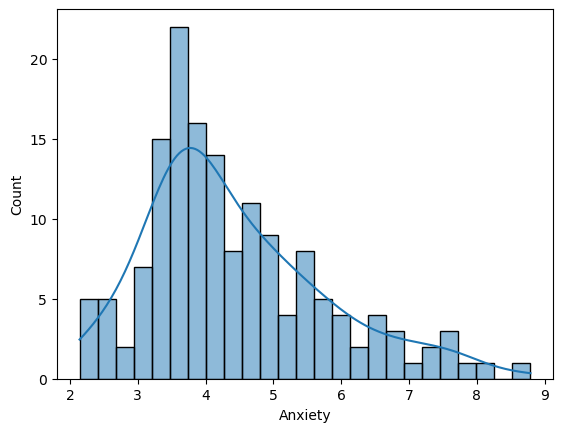

In [65]:
# checking for extreme values
# histogram of anxiety 

sns.histplot(reg['Anxiety'], bins=25, kde = True)

<AxesSubplot: xlabel='Depressive', ylabel='Count'>

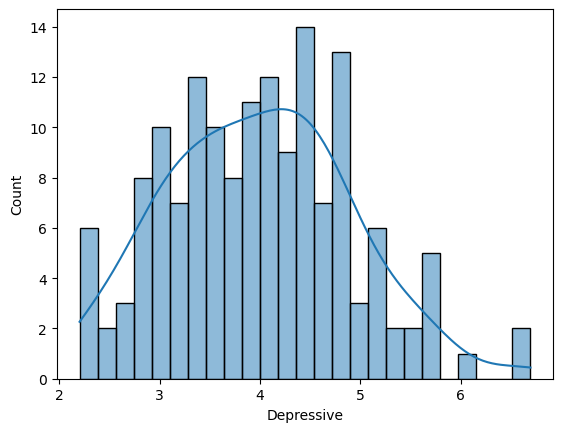

In [66]:
# checking for extreme values
# histogram of depressive 

sns.histplot(reg['Depressive'], bins=25, kde = True)

<AxesSubplot: xlabel='Social_support', ylabel='Count'>

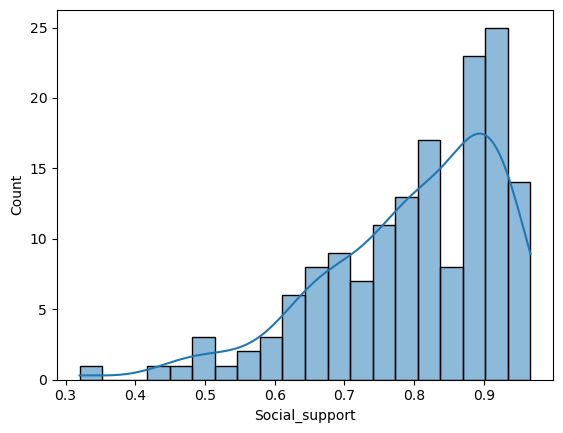

In [162]:
# checking for extreme values
# histogram of social_support

sns.histplot(reg['Social_support'], bins=20, kde = True)

### 3. Data Preparation for Regression

HYPOTHESIS: 

- The higher the social support, the higher the prevalence of anxiety disorder.
- The higher the social support, the lower the prevalence of depressive disorder.

#### a. Anxiety Disorder

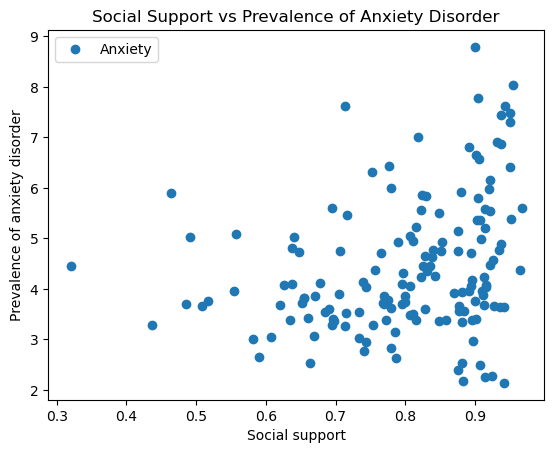

In [163]:
# creating a scatterplot using matplotlib to see relationship

reg.plot(x = 'Social_support', y='Anxiety',style='o') 
plt.title('Social Support vs Prevalence of Anxiety Disorder')  
plt.xlabel('Social support')  
plt.ylabel('Prevalence of anxiety disorder')  
plt.show()

In [120]:
# reshaping the variables into NumPy arrays and putting them into separate objects

X = reg['Social_support'].values.reshape(-1,1)
y_anxiety = reg['Anxiety'].values.reshape(-1,1)

In [164]:
# splitting the data into training set and testing set

X_train, X_test, y_anxiety_train, y_anxiety_test = train_test_split(X, y_anxiety, test_size=0.3, random_state=0)

#### b. Depressive Disorder

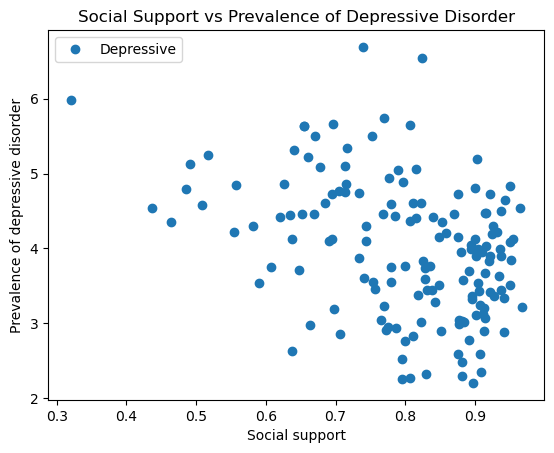

In [115]:
# creating a scatterplot using matplotlib to see relationship

reg.plot(x = 'Social_support', y='Depressive',style='o') 
plt.title('Social Support vs Prevalence of Depressive Disorder')  
plt.xlabel('Social support')  
plt.ylabel('Prevalence of depressive disorder')  
plt.show()

In [136]:
# reshaping the variables into NumPy arrays and putting them into separate objects

X = reg['Social_support'].values.reshape(-1,1)
y_depressive = reg['Depressive'].values.reshape(-1,1)

In [137]:
# splitting the data into training set and testing set

X_train, X_test, y_depressive_train, y_depressive_test = train_test_split(X, y_depressive, test_size=0.3, random_state=0)

### 4. Regression Analysis

#### a. Anxiety Disorder

In [138]:
# creating a regression object

regression_anxiety = LinearRegression()

In [139]:
# fitting the regression object onto the training set

regression_anxiety.fit(X_train, y_anxiety_train)

LinearRegression()

In [140]:
# predicting the values of y using X

y_anxiety_predicted = regression_anxiety.predict(X_test)

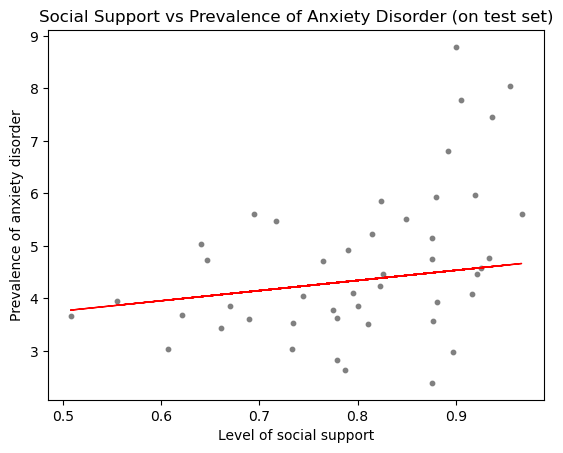

In [166]:
# creating a scatterplot that shows the regression line on the test set

plot_test = plt
plot_test.scatter(X_test, y_anxiety_test, color='gray', s = 10)
plot_test.plot(X_test, y_anxiety_predicted, color='red', linewidth =1)
plot_test.title('Social Support vs Prevalence of Anxiety Disorder (on test set)')
plot_test.xlabel('Level of social support')
plot_test.ylabel('Prevalence of anxiety disorder')
plot_test.show()

In [142]:
# creating objects that contain the model summary statistics

rmse_anxiety = mean_squared_error(y_test, y_anxiety_predicted)
r2_anxiety = r2_score(y_test, y_anxiety_predicted) 

In [153]:
# printing the model summary statistics to evaluate performance of model

print('Slope:' ,regression_anxiety.coef_)
print('Mean squared error: ', rmse_anxiety)
print('R2 score: ', r2_anxiety)

Slope: [[1.93456081]]
Mean squared error:  1.89766449905987
R2 score:  0.06902149280153613


In [135]:
# creating a dataframe comparing actual and predicted values of y

data = pd.DataFrame({'Actual': y_anxiety_test.flatten(), 'Predicted': y_anxiety_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.4293,4.072621
1,3.5727,4.490487
2,5.6047,4.138397
3,5.8543,4.387955
4,4.7736,4.600757
5,2.6425,4.316376
6,3.6230,4.300900
7,3.0341,4.211910
8,3.5130,4.362806
9,4.4574,4.391824


#### b. Depressive Disorder

In [144]:
# creating a regression object

regression_depressive = LinearRegression()

In [146]:
# fitting the regression object onto the training set

regression_depressive.fit(X_train, y_depressive_train)

LinearRegression()

In [147]:
# predicting the values of y using X

y_depressive_predicted = regression_depressive.predict(X_test)

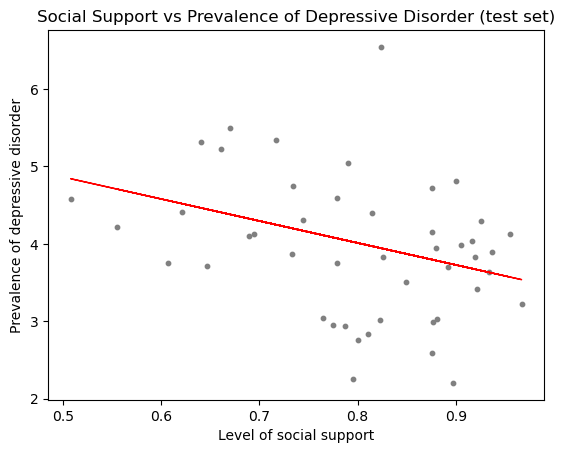

In [156]:
# creating a scatterplot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_depressive_test, color='gray', s = 10)
plot_test.plot(X_test, y_depressive_predicted, color='red', linewidth =1)
plot_test.title('Social Support vs Prevalence of Depressive Disorder (test set)')
plot_test.xlabel('Level of social support')
plot_test.ylabel('Prevalence of depressive disorder')
plot_test.show()

In [154]:
# creating objects that contain the model summary statistics

rmse_depressive = mean_squared_error(y_test, y_depressive_predicted)
r2_depressive = r2_score(y_test, y_depressive_predicted) 

In [155]:
# printing the model summary statistics to evaluate performance of model

print('Slope:' ,regression_depressive.coef_)
print('Mean squared error: ', rmse_depressive)
print('R2 score: ', r2_depressive)

Slope: [[-2.84020461]]
Mean squared error:  2.9177347863543024
R2 score:  -0.4314165528979834


In [158]:
# creating a dataframe comparing actual and predicted values of y

data = pd.DataFrame({'Actual': y_depressive_test.flatten(), 'Predicted': y_depressive_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.2243,4.406197
1,2.9919,3.792712
2,4.1292,4.309630
3,6.5438,3.943243
4,3.6355,3.630821
5,2.9359,4.048331
6,4.5916,4.071052
7,3.8714,4.201702
8,2.8336,3.980166
9,3.8350,3.937563


### 5. Interpretations of the performance of the regression lines

ANXIETY DISORDER: 

- Regression line for prevalence of anxiety disorder has a slope of 1.93, mean squared error of 1.90 and an R2 score of 0.069.
- The positive slope of 1.93 shows a positive relationship between the level of social support and anxiety disorder. 
- The mean squared error is very high, meaning the distance between the regression line and the data points are large, indicating that the regression line is not an accurate representation of the data. 
- R2 score is very low, being close to 0. This indicates a poor fit. The model is not a close representation of the data. It is also clear that the relationship is not linear as there is a wider range of prevalence with a higher level of social support.

DEPRESSIVE DISORDER:

- Regression line for prevalence of depressive disorder has a slope of -2.84, mean squared error of 2.92 and an R2 score of -0.43.
- The negative slope of -2.84 shows a negative relationship between the level of social support and depressive disorder. 
- The mean squared error is again very high, meaning the distance between the regression line and the data points are large, indicating that the regression line is not an accurate representation of the data. 
- R2 score a negative value, indicating a worse fit than a horizontal line. The model is not a close representation of the data. 

BOTH: 

- The limited number of data points (153) could have negatively impacted the model's accuracy. 
- Both the correlation coefficient (anxiety: 0.4; depressive: -0.4) and the scatterplots showed a lack of strong linear relationship between the respective variables, so a weak regression was expected.